In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl
/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-excha

In [2]:
# %cd /kaggle/working

In [3]:
# from IPython.display import FileLink
# FileLink(r'train_alot_of_features.csv')

In [4]:
!pip install ../input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl
import talib as ta 

Processing /kaggle/input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from lightgbm import early_stopping
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
import missingno as msno

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit 

import statsmodels.api as sm
from pylab import rcParams

from tqdm import tqdm


from talib import abstract

import plotly.graph_objects as go

import time
import gc
import sys

# sys.path.insert(0, '../input/jpx-local-api')
# from local_api import local_api

In [31]:
def get_ta_features(df, inf=None, train=True):
    """
    Get technical features from TA-Lib
    ref : https://www.kaggle.com/code/daosword/jpx-pytorch-neural-network-with-ta-lib-features
    """
    if train:
        op = df['Open']
        hi = df['High']
        lo = df['Low']
        cl = df['Close']
        vo = df['Volume']

    #     # Overlap Studies
    #     df['BBANDS_upper'], df['BBANDS_middle'], df['BBANDS_lower'] = ta.BBANDS(cl, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    #     df['DEMA'] = ta.DEMA(cl, timeperiod=30)
        
        df['EMA7'] = ta.EMA(cl, 7)/cl
        df['EMA15'] = ta.EMA(cl, 15)/cl
        df['EMA30'] = ta.EMA(cl, 30)/cl
        df['EMA90'] = ta.EMA(cl, 90)/cl

    #     df['HT_TRENDLINE'] = ta.HT_TRENDLINE(cl)
    #     df['KAMA'] = ta.KAMA(cl, timeperiod=30)
    #     df['MA'] = ta.MA(cl, timeperiod=30, matype=0)
    #     df['MIDPOINT'] = ta.MIDPOINT(cl, timeperiod=14)
    #     df['SAR'] = ta.SAR(hi, lo, acceleration=0, maximum=0)
    #     df['SAREXT'] = ta.SAREXT(hi, lo, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    #     df['SMA'] = ta.SMA(cl, timeperiod=30)
    #     df['T3'] = ta.T3(df['Close'], timeperiod=5, vfactor=0)
    #     df['TEMA'] = ta.TEMA(df['Close'], timeperiod=30)
    #     df['TRIMA'] = ta.TRIMA(df['Close'], timeperiod=30)
    #     df['WMA'] = ta.WMA(df['Close'], timeperiod=30)

        # Momentum Indicators
    #     df['ADX'] = ta.ADX(hi, lo, cl, timeperiod=14)
    #     df['ADXR'] = ta.ADXR(hi, lo, cl, timeperiod=14)
    #     df['APO'] = ta.APO(cl, fastperiod=12, slowperiod=26, matype=0)
    #     df['AROON_down'], df['AROON_up'] = ta.AROON(hi, lo, timeperiod=14)
    #     df['AROONOSC'] = ta.AROONOSC(hi, lo, timeperiod=14)
    #     df['BOP'] = ta.BOP(op, hi, lo, cl)
    #     df['CCI'] = ta.CCI(hi, lo, cl, timeperiod=14)
    #     df['DX'] = ta.DX(hi, lo, cl, timeperiod=14)
    #     df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = ta.MACD(cl, fastperiod=12, slowperiod=26, signalperiod=9)
    #     df['MFI'] = ta.MFI(hi, lo, cl, vo, timeperiod=14)
    #     df['MINUS_DI'] = ta.MINUS_DI(hi, lo, cl, timeperiod=14)
    #     df['MINUS_DM'] = ta.MINUS_DM(hi, lo, timeperiod=14)
        df['MOM'] = ta.MOM(cl, timeperiod=10)
    #     df['PLUS_DI'] = ta.PLUS_DI(hi, lo, cl, timeperiod=14)
    #     df['PLUS_DM'] = ta.PLUS_DM(hi, lo, timeperiod=14)
        df['RSI'] = ta.RSI(cl, timeperiod=14)
        df['STOCH_slowk'], df['STOCH_slowd'] = ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
        df['STOCHF_fastk'], df['STOCHF_fastd'] = ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)
        df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    #     df['TRIX'] = ta.TRIX(cl, timeperiod=30)
    #     df['ULTOSC'] = ta.ULTOSC(hi, lo, cl, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    #     df['WILLR'] = ta.WILLR(hi, lo, cl, timeperiod=14)

        # Volume Indicators
    #     df['AD'] = ta.AD(hi, lo, cl, vo)
    #     df['ADOSC'] = ta.ADOSC(hi, lo, cl, vo, fastperiod=3, slowperiod=10)
    #     df['OBV'] = ta.OBV(cl, vo)

        # Volatility Indicators
        df['ATR'] = ta.ATR(hi, lo, cl, timeperiod=14)
        df['NATR'] = ta.NATR(hi, lo, cl, timeperiod=14)
        df['TRANGE'] = ta.TRANGE(hi, lo, cl)

        # Cycle Indicators
    #     df['HT_DCPERIOD'] = ta.HT_DCPERIOD(cl)
    #     df['HT_DCPHASE'] = ta.HT_DCPHASE(cl)
    #     df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = ta.HT_PHASOR(cl)
    #     df['HT_SINE_sine'], df['HT_SINE_leadsine'] = ta.HT_SINE(cl)
    #     df['HT_TRENDMODE'] = ta.HT_TRENDMODE(cl)

        # Statistic Functions
    #     df['BETA'] = ta.BETA(hi, lo, timeperiod=5)
    #     df['CORREL'] = ta.CORREL(hi, lo, timeperiod=30)
    #     df['LINEARREG'] = ta.LINEARREG(cl, timeperiod=14) - cl
    #     df['LINEARREG_ANGLE'] = ta.LINEARREG_ANGLE(cl, timeperiod=14)
    #     df['LINEARREG_INTERCEPT'] = ta.LINEARREG_INTERCEPT(cl, timeperiod=14) - cl
    #     df['LINEARREG_SLOPE'] = ta.LINEARREG_SLOPE(cl, timeperiod=14)
        df['STDDEV'] = ta.STDDEV(cl, timeperiod=5, nbdev=1)   
    
    
    else: #inference 
        op = inf['Open']
        hi = inf['High']
        lo = inf['Low']
        cl = inf['Close']
        vo = inf['Volume']
        
            #     # Overlap Studies
    #     df['BBANDS_upper'], df['BBANDS_middle'], df['BBANDS_lower'] = ta.BBANDS(cl, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    #     df['DEMA'] = ta.DEMA(cl, timeperiod=30)

        df['EMA7'] = ta.EMA(cl, 7).iloc[-1]
        df['EMA15'] = ta.EMA(cl, 15).iloc[-1]
        df['EMA30'] = ta.EMA(cl, 30).iloc[-1]
        df['EMA90'] = ta.EMA(cl, 90).iloc[-1]

    #     df['HT_TRENDLINE'] = ta.HT_TRENDLINE(cl)
    #     df['KAMA'] = ta.KAMA(cl, timeperiod=30)
    #     df['MA'] = ta.MA(cl, timeperiod=30, matype=0)
    #     df['MIDPOINT'] = ta.MIDPOINT(cl, timeperiod=14)
    #     df['SAR'] = ta.SAR(hi, lo, acceleration=0, maximum=0)
    #     df['SAREXT'] = ta.SAREXT(hi, lo, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    #     df['SMA'] = ta.SMA(cl, timeperiod=30)
    #     df['T3'] = ta.T3(df['Close'], timeperiod=5, vfactor=0)
    #     df['TEMA'] = ta.TEMA(df['Close'], timeperiod=30)
    #     df['TRIMA'] = ta.TRIMA(df['Close'], timeperiod=30)
    #     df['WMA'] = ta.WMA(df['Close'], timeperiod=30)

        # Momentum Indicators
    #     df['ADX'] = ta.ADX(hi, lo, cl, timeperiod=14)
    #     df['ADXR'] = ta.ADXR(hi, lo, cl, timeperiod=14)
    #     df['APO'] = ta.APO(cl, fastperiod=12, slowperiod=26, matype=0)
    #     df['AROON_down'], df['AROON_up'] = ta.AROON(hi, lo, timeperiod=14)
    #     df['AROONOSC'] = ta.AROONOSC(hi, lo, timeperiod=14)
    #     df['BOP'] = ta.BOP(op, hi, lo, cl)
    #     df['CCI'] = ta.CCI(hi, lo, cl, timeperiod=14)
    #     df['DX'] = ta.DX(hi, lo, cl, timeperiod=14)
    #     df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = ta.MACD(cl, fastperiod=12, slowperiod=26, signalperiod=9)
    #     df['MFI'] = ta.MFI(hi, lo, cl, vo, timeperiod=14)
    #     df['MINUS_DI'] = ta.MINUS_DI(hi, lo, cl, timeperiod=14)
    #     df['MINUS_DM'] = ta.MINUS_DM(hi, lo, timeperiod=14)
        df['MOM'] = ta.MOM(cl, timeperiod=10).iloc[-1]
    #     df['PLUS_DI'] = ta.PLUS_DI(hi, lo, cl, timeperiod=14)
    #     df['PLUS_DM'] = ta.PLUS_DM(hi, lo, timeperiod=14)
        df['RSI'] = ta.RSI(cl, timeperiod=14).iloc[-1]
        df['STOCH_slowk'], df['STOCH_slowd'] = (ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[0].iloc[-1],
                                                ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[1].iloc[-1])
        df['STOCHF_fastk'], df['STOCHF_fastd'] = (ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)[0].iloc[-1],
                                                  ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)[1].iloc[-1])
        df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = (ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[0].iloc[-1],
                                                      ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[1].iloc[-1])
    #     df['TRIX'] = ta.TRIX(cl, timeperiod=30)
    #     df['ULTOSC'] = ta.ULTOSC(hi, lo, cl, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    #     df['WILLR'] = ta.WILLR(hi, lo, cl, timeperiod=14)

        # Volume Indicators
    #     df['AD'] = ta.AD(hi, lo, cl, vo)
    #     df['ADOSC'] = ta.ADOSC(hi, lo, cl, vo, fastperiod=3, slowperiod=10)
    #     df['OBV'] = ta.OBV(cl, vo)

        # Volatility Indicators
        df['ATR'] = ta.ATR(hi, lo, cl, timeperiod=14).iloc[-1]
        df['NATR'] = ta.NATR(hi, lo, cl, timeperiod=14).iloc[-1]
        df['TRANGE'] = ta.TRANGE(hi, lo, cl).iloc[-1]

        # Cycle Indicators
    #     df['HT_DCPERIOD'] = ta.HT_DCPERIOD(cl)
    #     df['HT_DCPHASE'] = ta.HT_DCPHASE(cl)
    #     df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = ta.HT_PHASOR(cl)
    #     df['HT_SINE_sine'], df['HT_SINE_leadsine'] = ta.HT_SINE(cl)
    #     df['HT_TRENDMODE'] = ta.HT_TRENDMODE(cl)

        # Statistic Functions
    #     df['BETA'] = ta.BETA(hi, lo, timeperiod=5)
    #     df['CORREL'] = ta.CORREL(hi, lo, timeperiod=30)
    #     df['LINEARREG'] = ta.LINEARREG(cl, timeperiod=14) - cl
    #     df['LINEARREG_ANGLE'] = ta.LINEARREG_ANGLE(cl, timeperiod=14)
    #     df['LINEARREG_INTERCEPT'] = ta.LINEARREG_INTERCEPT(cl, timeperiod=14) - cl
    #     df['LINEARREG_SLOPE'] = ta.LINEARREG_SLOPE(cl, timeperiod=14)
        df['STDDEV'] = ta.STDDEV(cl, timeperiod=5, nbdev=1).iloc[-1]   
    
    return df

In [7]:
train = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
# display(data)


# using supplement data as test data
supp_data = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv')

# train_with_supp = pd.concat([train, supp_data]).reset_index(drop=True)
# train_with_supp = train.copy()
# train_with_supp

# TA Features
# train

In [8]:
def divideSecurities(df):
    sec_list = []
    print('Divide securities individually..')
    for code in np.sort(df.SecuritiesCode.unique()):
        sec_list.append(df.loc[df.SecuritiesCode == code, :].reset_index(drop=True))
    return sec_list

# sec_list = divideSecurities(train)

In [9]:
def add_features_test1(sec_list): # only basic features
    df_list = []
    for df in tqdm(sec_list):
        
        
        
        # lagged feature 계산하기 전 결측치 채워넣기
        df = df.fillna(method='ffill')
        
        
        
        
        df_list.append(df)
        
        del df
        
    gc.collect()
    df_feature_added = pd.concat(df_list).sort_values(['Date','SecuritiesCode'])
    
    return df_feature_added




In [ ]:
df_test3 = train[train.SecuritiesCode == 1377]
df_test3

In [ ]:
def ema(dfc, move, colname):
    # Exponential Moving Averages
    # EMA = Today Price * K + Yesterday EMA * (1 - K)
    df = dfc.copy()
    K = 2 / (move + 1)
    ema_list = []
    ema_list.append(df[colname].iloc[0])
    for i in range(1, df.shape[0]) : 
        ema = df[colname].iloc[i] * K + ema_list[-1] * (1 - K)
        ema_list.append(ema)
    df['ema{}'.format(move)] = ema_list
    return df

def stoch(dfc): 
    df = dfc.copy()
    df['ndays_high'] = df.High.rolling(window = 14, min_periods = 1).max()
    df['ndays_low'] = df.Low.rolling(window = 14, min_periods = 1).min()
    df['fast_k'] = (df['Close'] - df['ndays_low']) / (df['ndays_high'] - df['ndays_low'])* 100
    df['slow_d'] = df['fast_k'].rolling(window = 3).mean()
    df = df.drop(['ndays_high', 'ndays_low', 'fast_k'], axis = 'columns')
    df['slow_d'] = df['slow_d'].fillna(0)
    return df

def tech(dfc):
    df = dfc.copy()
    tech = ['notact']
    for i in range(1, df.shape[0]):
        if (df['ema130'].values[i-1] < df['ema130'].values[i]) & \
            (df['slow_d'].values[i-1] >= 30) & (df['slow_d'].values[i] < 30) : 
            tech.append('buy')
        elif (df['ema130'].values[i-1] > df['ema130'].values[i]) & \
            (df['slow_d'].values[i-1] >= 70) & (df['slow_d'].values[i] < 70) : 
            tech.append('sell')
        else : 
            tech.append('notact')
    df['Tech'] = tech
    return df

def add_features(dfc):
    df = dfc.copy()
    df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
    df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
    # df['Date'] = pd.to_datetime(df['Date'])
    return df

def standard(dfc, avg, std):
    return (dfc - avg) / std

df = df_test3.copy().fillna(method='ffill')
df = add_features(df)
## First Window
df = ema(df, 60, 'Close') # EMA 60
df = ema(df, 130, 'Close') # EMA 130
df['macd'] = df['ema60'] - df['ema130']
df = ema(df, 45, 'macd') # Signal
df['macdhist'] = df['macd'] - df['ema45'] # EMA45 == macd signal f

# Second Window
df = stoch(df)
# Third Window
df = tech(df)

# one-hot encoding
_notact = df.pop('Tech')
df['buy'] = (_notact == 'buy') * 1
df['sell'] = (_notact == 'sell') * 1
df['notact'] = (_notact == 'notact') * 1

df


In [ ]:
df.columns

In [ ]:
def ema(dfc, move, colname):
    # Exponential Moving Averages
    # EMA = Today Price * K + Yesterday EMA * (1 - K)
    df = dfc.copy()
    K = 2 / (move + 1)
    ema_list = []
    ema_list.append(df[colname].iloc[0])
    for i in range(1, df.shape[0]) : 
        ema = df[colname].iloc[i] * K + ema_list[-1] * (1 - K)
        ema_list.append(ema)
    df['ema{}'.format(move)] = ema_list
    return df

def stoch(dfc): 
    df = dfc.copy()
    df['ndays_high'] = df.High.rolling(window = 14, min_periods = 1).max()
    df['ndays_low'] = df.Low.rolling(window = 14, min_periods = 1).min()
    df['fast_k'] = (df['Close'] - df['ndays_low']) / (df['ndays_high'] - df['ndays_low'])* 100
    df['slow_d'] = df['fast_k'].rolling(window = 3).mean()
    df = df.drop(['ndays_high', 'ndays_low', 'fast_k'], axis = 'columns')
    df['slow_d'] = df['slow_d'].fillna(0)
    return df

def tech(dfc):
    df = dfc.copy()
    tech = ['notact']
    for i in range(1, df.shape[0]):
        if (df['ema130'].values[i-1] < df['ema130'].values[i]) & \
            (df['slow_d'].values[i-1] >= 30) & (df['slow_d'].values[i] < 30) : 
            tech.append('buy')
        elif (df['ema130'].values[i-1] > df['ema130'].values[i]) & \
            (df['slow_d'].values[i-1] >= 70) & (df['slow_d'].values[i] < 70) : 
            tech.append('sell')
        else : 
            tech.append('notact')
    df['Tech'] = tech
    return df

def add_features(dfc):
    df = dfc.copy()
    df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
    df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
    # df['Date'] = pd.to_datetime(df['Date'])
    return df

def standard(dfc, avg, std):
    return (dfc - avg) / std



def add_features_test3(sec_list): # hp features only
    df_list = []
    for df in tqdm(sec_list):
        
        # lagged feature 계산하기 전 결측치 채워넣기
        df = df.fillna(method='ffill')

        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
        
        ## First Window
        df = ema(df, 60, 'Close') # EMA 60
        df = ema(df, 130, 'Close') # EMA 130
        df['macd'] = df['ema60'] - df['ema130']
        df = ema(df, 45, 'macd') # Signal
        df['macdhist'] = df['macd'] - df['ema45'] # EMA45 == macd signal f

        # Second Window
        df = stoch(df)
        # Third Window
        df = tech(df)

        # one-hot encoding
        _notact = df.pop('Tech')
        df['buy'] = (_notact == 'buy') * 1
        df['sell'] = (_notact == 'sell') * 1
        df['notact'] = (_notact == 'notact') * 1

        
        
        df_list.append(df)
        
        del df
        
    gc.collect()
    df_feature_added = pd.concat(df_list).sort_values(['Date','SecuritiesCode'])
    
    return df_feature_added


def preprocess_train_test3(df, train=True, trained_scalers=None):
    
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    if train:
    #     minmax = MinMaxScaler()
        stdsc = StandardScaler()
    #     ordinal = OrdinalEncoder()
    else:
        stdsc = trained_scalers[0]

    target = ['Target']
#     minmax_features = ['Date']

    # not used in case1
    #ord_features = ['SecuritiesCode'] 
    
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode', 'buy', 'sell', 'notact']]
    
    
#     date_scaled = minmax.fit_transform(dfc.loc[:,minmax_features])
#     date_code_ord = ordinal.fit_transform(dfc.loc[:,ord_features])
    scaled = stdsc.fit_transform(dfc.loc[:,scaled_features])
    
#     display(pd.DataFrame(date_code_ord, columns=ord_features))
#     display(pd.DataFrame(scaled, columns=scaled_features))
    
    
    dfc_scaled = pd.concat([dfc.loc[:, ['SecuritiesCode']].reset_index(drop=True),
#                             pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features),
                           dfc.loc[:, ['buy', 'sell', 'notact']].reset_index(drop=True)], 
                            axis=1)
    dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
                           axis=1)
    dfc_scaled = dfc_scaled.set_index(['Date'])

    y = dfc.set_index(['Date']).loc[:, ['Target']]
    
    if train:
        return dfc_scaled, y, [stdsc]
    else:
        return dfc_scaled
    

# df_test3_added = add_features_test3([df_test3])

# X_scaled_test3, y_test3, trained_scalers_test3 = preprocess_train_test3(df_test3_added)  # 2021-12-06부터 test 시작이므로 그 전까지만 이용한다.

# X_scaled_test3
# y


In [68]:
def add_features_train(sec_list):
    df_list = []
    for df in tqdm(sec_list):
        
        # shadows
        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
        

        ## Rolling features ##
        
        # lagged features
        # 날짜 단위이므로 7일전, 30일전, 180일전, 360일전 
        # lagged close, target (target 은 정확히 무엇? return인가)
        
        # lagged feature 계산하기 전 결측치 채워넣기
        df = df.fillna(method='ffill')
        
        
        
        # All indicators in ta
        try:
            df = get_ta_features(df.copy())
        except:
            print(f"error in SecuritiesCode: {df['SecuritiesCode'][0]}")
            display(df)
            continue
                
        # not add pattern recognition - feature importance 가 거의 0임. 
#         for indicator in ta.get_function_groups()['Pattern Recognition']:
#             df[str(indicator)] = getattr(ta,str(indicator))(df.Open, df.High, df.Low, df.Close)


        ####  For test!! df['STOCHF_fastd'] df['STOCHRSI_fastk'] df['ATR']
        ####  open high low close 등 제거
        df = df.drop(columns=['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close'])

        # fill ema features by backward -- 이렇게 채워진 것은 false data 이므로 일단 test 해보고 없애는 것을 검토하자.
        df = df.fillna(method='bfill')

    
        # volatility
        
        df_list.append(df)
        
        del df
        
    gc.collect()
    df_feature_added = pd.concat(df_list).sort_values(['Date','SecuritiesCode'])
    
    return df_feature_added



In [ ]:
# add feature to data

df_added = add_features_train(sec_list)
# df_added.to_csv('train_alot_of_features.csv', index=False)

# load data
# df_added = pd.read_csv('/kaggle/input/train-with-supp-feature-added-v1-all-cdl/train_with_supp_feature_added.csv')

# df_added

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [ ]:
df_ex = reduce_mem_usage(df_added).loc[df_added.SecuritiesCode == 1377, :]



In [11]:
def add_features_infer(input_df, close_df): #input df 는 price 데이터
    
    df_list = []
    
    print('Divide input securities...')
    sec_list = divideSecurities(input_df)
    print('Divide close_df securities...')
    close_list = divideSecurities(close_df) # for rolling features
    print('='*10 + 'feature adding' + '='*10)
    for i in range(len(sec_list)):
        
        if i == 0:
            t0 = time.time()
        close = close_list[i] #.loc[close_df.SecuritiesCode == code, :].fillna(method='ffill')
        df = sec_list[i]
#         display(df)
        # test data의 open, high, low, close 중 nan 있으면 이전 값에서 가져와 채움
        if df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']].isna().any().any():
            df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']] = close.loc[close['Date'] == close.iloc[-1]['Date'], ['Open', 'High', 'Low', 'Close', 'Volume']].values 
        
        if i == 0:
            t1 = time.time()
            print(t1 - t0, 's')
        # shadows
        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
       
        if i == 0:
            t2 = time.time()
            print(t2 - t1, 's')
            
        # lagged features
        # 날짜 단위이므로 7일전, 30일전, 180일전, 360일전 
        # lagged close, target (target 은 정확히 무엇? return인가)
        
        ## Rolling features ##
        # TA-lib features - RSI, EMA 7-90
        df = get_ta_features(df, close, train=False)

        if i == 0:
            t3 = time.time()
            print(t3 - t2, 's')
        
#         for indicator in ta.get_function_groups()['Pattern Recognition']:
#             df[str(indicator)] = getattr(ta,str(indicator))(df.Open, df.High, df.Low, df.Close)


        # volatility
        
        df_list.append(df)
    
    df_feature_added = pd.concat(df_list)
    print('='*10 + 'feature added' + '='*10)
    return df_feature_added




In [51]:
def preprocess_train(df):
    
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
#     minmax = MinMaxScaler()
    stdsc = StandardScaler()
    ordinal = OrdinalEncoder()

    target = ['Target']
#     minmax_features = ['Date']
    ord_features = ['SecuritiesCode'] 
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
    
#     date_scaled = minmax.fit_transform(dfc.loc[:,minmax_features])
    date_code_ord = ordinal.fit_transform(dfc.loc[:,ord_features])
    scaled = stdsc.fit_transform(dfc.loc[:,scaled_features])
    
#     display(pd.DataFrame(date_code_ord, columns=ord_features))
#     display(pd.DataFrame(scaled, columns=scaled_features))
    
    
    dfc_scaled = pd.concat([# pd.DataFrame(date_scaled, columns=minmax_features),
                            pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features)], 
                            axis=1)
    dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
                           axis=1)
    dfc_scaled = dfc_scaled.set_index(['Date'])

    y = dfc.set_index(['Date']).loc[:, ['Target']]
    
    
    return dfc_scaled, y, [ordinal, stdsc]
    

# X_scaled, y, trained_scalers = preprocess_train(df_added)  # 2021-12-06부터 test 시작이므로 그 전까지만 이용한다.

# X_scaled
# y

In [ ]:
def preprocess_train_test1(df):
    
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
#     minmax = MinMaxScaler()
    stdsc = StandardScaler()
#     ordinal = OrdinalEncoder()

    target = ['Target']
#     minmax_features = ['Date']

    # not used in case1
    #ord_features = ['SecuritiesCode'] 
    
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
    
#     date_scaled = minmax.fit_transform(dfc.loc[:,minmax_features])
#     date_code_ord = ordinal.fit_transform(dfc.loc[:,ord_features])
    scaled = stdsc.fit_transform(dfc.loc[:,scaled_features])
    
#     display(pd.DataFrame(date_code_ord, columns=ord_features))
#     display(pd.DataFrame(scaled, columns=scaled_features))
    
    
    dfc_scaled = pd.concat([dfc.loc[:, ['SecuritiesCode']].reset_index(drop=True),
#                             pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features)], 
                            axis=1)
    dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
                           axis=1)
    dfc_scaled = dfc_scaled.set_index(['Date'])

    y = dfc.set_index(['Date']).loc[:, ['Target']]
    
    
    return dfc_scaled, y, [stdsc]
    

# X_scaled, y, trained_scalers = preprocess_train(df_added)  # 2021-12-06부터 test 시작이므로 그 전까지만 이용한다.

# X_scaled
# y

In [ ]:
def preprocess_inference_test1(df, trained_scalers: list):
#     ordinal = trained_scalers[0]
    stdsc = trained_scalers[0]
    
      
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
    target = ['Target']
#     ord_features = ['SecuritiesCode'] 
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
#     date_code_ord = ordinal.transform(dfc.loc[:,ord_features])
    scaled = stdsc.transform(dfc.loc[:,scaled_features])
    dfc_scaled = pd.concat([dfc.loc[:, ['SecuritiesCode']].reset_index(drop=True),
                            pd.DataFrame(scaled, columns=scaled_features)], axis=1)

    
    return dfc_scaled
    

# X_test_scaled = preprocess_train(df_added, trained_scalers)

# X_test_scaled

In [52]:
def preprocess_inference(df, trained_scalers: list):
    ordinal = trained_scalers[0]
    stdsc = trained_scalers[1]
    
      
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
    target = ['Target']
#     ord_features = ['SecuritiesCode'] 
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
#     date_code_ord = ordinal.transform(dfc.loc[:,ord_features])
    scaled = stdsc.transform(dfc.loc[:,scaled_features])
    dfc_scaled = pd.concat([dfc.loc[:, ['SecuritiesCode']].reset_index(drop=True),
                            pd.DataFrame(scaled, columns=scaled_features)], axis=1)

    
    return dfc_scaled
    

# X_test_scaled = preprocess_train(df_added, trained_scalers)

# X_test_scaled

feature importance : only 9997

In [ ]:
X_scaled, y, trained_scalers = preprocess_train(train_9997)
lgb = LGBMRegressor()
lgb.fit(X_scaled, y)
feature_imp = pd.DataFrame(
    sorted(zip(lgb.feature_importances_, X_scaled.columns), reverse=True),
    columns = ['Value', 'Feature'])
display(feature_imp)
plt.figure(figsize=(10,35))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.show()

feature importance - all securities

In [ ]:
feature_imp = pd.DataFrame(
    sorted(zip(lgb.feature_importances_, X_scaled.columns), reverse=True),
    columns = ['Value', 'Feature'])
display(feature_imp)
plt.figure(figsize=(10,35))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.show()

In [ ]:
# top 15 features
feature_imp.iloc[:10]['Feature'].values

In [ ]:
# permutation importance - 1333
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lgb, random_state=1).fit(X_scaled, y)
eli5.show_weights(perm, feature_names = X_scaled.columns.tolist())

In [ ]:
#handpicked features
'MFI', 'HT_PHASOR_quadrature', 'CORREL', 'STDDEV', 'RSI', 'STOCH_slowk', 'EMA7', 'EMA30'

In [ ]:
# eval - 9997
X_test_scaled, y_test, _ = preprocess_train(eval_9997)

# permutation importance - 9997 - on test set

perm = PermutationImportance(lgb, random_state=1).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X_test_scaled.columns.tolist())

### Evaluation

In [ ]:
def timeseriesCVerror(X, y, fold, loss, Model):#model, loss_function):
    errors = []
    tscv = TimeSeriesSplit(test_size=120)
    # split input : index date
    grid = X.index.unique()
    
    k = 0
    for train_idx, test_idx in tscv.split(grid):
        t0 = time.time()
        k += 1
        print(f'========Training fold {k}========')
        
        print('training size:', len(train_idx), '  test size:', len(test_idx))
#         print(grid[train_idx])
        X_train, y_train = X.loc[grid[train_idx], :], y.loc[grid[train_idx], :]
        X_test, y_test = X.loc[grid[test_idx], :], y.loc[grid[test_idx], :]
        
        mod = Model.fit(X_train, y_train,           
                        eval_set=[(X_test, y_test)],
                        eval_metric="rmse",
                        callbacks=[early_stopping(stopping_rounds=10)]
                       )
        y_pred = mod.predict(X_test)
        error = loss(y_pred, y_test)
        errors.append(error)
        
        print(f'Fold {k} finished with loss: {error:.10f} in {time.time() - t0:.4f}s\n\n')
        
#     print(errors)
    print(f'Average Loss: {np.mean(errors):.10f}')
    return


timeseriesCVerror(X_scaled, y, 10, mean_squared_error, 
                  LGBMRegressor(seed=47)
                 )

In [ ]:
def evaluate(df):
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)

    y_pred = lgb.predict(X_scaled)
    print(mean_squared_error(y_pred, y))
    return

evaluate(supp_data)

In [ ]:
def evaluate(df):
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)

    y_pred = lgb.predict(X_scaled)
    print(mean_squared_error(y_pred, y))
    return

evaluate(supp_data)

## Test

In [ ]:
# import jpx_tokyo_market_prediction
# env = jpx_tokyo_market_prediction.make_env()
# iter_test = env.iter_test()

In [ ]:
for i, (prices, options, financials, trades, secondary_prices, sample_prediction) in enumerate(iter_test):
#     t0 = time.time()
    
    # 이전 데이터와 합치고 최근 140일치만 이용한다
    today = prices.iloc[0]['Date']
    lastday = str(pd.to_datetime(today) - pd.DateOffset(140))
    
    if i == 0:
        close_df = pd.concat([
            train_with_supp.loc[
                (train_with_supp['Date'] > lastday) & (train_with_supp['Date'] < today), 
                    ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close']],
                prices.loc[:, ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close']]
            ]).reset_index(drop=True)
        
    else:
        close_df = pd.concat([
            close_df.loc[
                (close_df['Date'] > lastday) & (close_df['Date'] < today), 
                    ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close']],
                prices.loc[:, ['Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close']]
            ]).reset_index(drop=True)
        

    feat = add_features_infer(prices, close_df)
    X = preprocess_inference(feat, trained_scalers)

    # X, y
    X['Target'] = lgb.predict(X)
    X['Rank'] = (X['Target'].rank(method='first', ascending=False)-1).astype(int)
    sample_prediction['Rank'] = X['Rank'].values
    
    # check Rank
    assert sample_prediction["Rank"].notna().all()
    assert sample_prediction["Rank"].min() == 0
    assert sample_prediction["Rank"].max() == len(sample_prediction["Rank"]) - 1
#     display(sample_prediction)

    env.predict(sample_prediction)
#     print(time.time() - t0)

### Evaluation - Sharpe ratio

timeseriesCV - mean sharpe ratio 계산  
-- 비교 -- 
1. 기존 LGBM 모델
2. TA Feature 더 추가되어 학습된 LGBM 모델

In [37]:
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

### Check stationary features

In [32]:
# sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
df_1377_added = add_features_train([train.loc[train.SecuritiesCode == 1377, :]])
df_1377_added

  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 1/1 [00:00<00:00, 55.64it/s]


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,STOCH_slowk,STOCH_slowd,STOCHF_fastk,STOCHF_fastd,STOCHRSI_fastk,STOCHRSI_fastd,ATR,NATR,TRANGE,STDDEV
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,13.0,...,52.713178,63.451048,72.093023,60.895780,32.021141,6.176991e+01,82.857143,2.549451,60.0,41.109610
1869,20170105_1377,2017-01-05,1377,3340.0,3355.0,3295.0,3305.0,155700,1.0,13.0,...,52.713178,63.451048,72.093023,60.895780,32.021141,6.176991e+01,82.857143,2.549451,60.0,41.109610
3734,20170106_1377,2017-01-06,1377,3320.0,3335.0,3260.0,3315.0,153300,1.0,13.0,...,52.713178,63.451048,72.093023,60.895780,32.021141,6.176991e+01,82.857143,2.549451,75.0,41.109610
5599,20170110_1377,2017-01-10,1377,3325.0,3360.0,3310.0,3330.0,192500,1.0,13.0,...,52.713178,63.451048,72.093023,60.895780,32.021141,6.176991e+01,82.857143,2.549451,50.0,41.109610
7464,20170111_1377,2017-01-11,1377,3260.0,3295.0,3180.0,3220.0,741200,1.0,13.0,...,52.713178,63.451048,72.093023,60.895780,32.021141,6.176991e+01,82.857143,2.549451,150.0,41.109610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322536,20211129_1377,2021-11-29,1377,3140.0,3160.0,3110.0,3125.0,127100,1.0,18.0,...,8.781362,6.677287,9.677419,8.781362,0.000000,2.368476e-14,46.358903,1.483485,65.0,44.090815
2324536,20211130_1377,2021-11-30,1377,3130.0,3190.0,3115.0,3125.0,115000,1.0,18.0,...,12.007168,9.192885,9.677419,12.007168,0.000000,2.368476e-14,48.404695,1.548950,75.0,45.166359
2326536,20211201_1377,2021-12-01,1377,3120.0,3145.0,3110.0,3135.0,61800,1.0,18.0,...,12.861869,11.216800,19.230769,12.861869,37.049735,1.234991e+01,47.447217,1.513468,35.0,35.213634
2328536,20211202_1377,2021-12-02,1377,3110.0,3150.0,3110.0,3110.0,88700,1.0,18.0,...,9.636063,11.501700,0.000000,9.636063,17.993913,1.834788e+01,46.915273,1.508530,40.0,22.000000


In [14]:
df_1377_added.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target', 'upper_shadow', 'lower_shadow', 'EMA7', 'EMA15', 'EMA30',
       'EMA90', 'MOM', 'RSI', 'STOCH_slowk', 'STOCH_slowd', 'STOCHF_fastk',
       'STOCHF_fastd', 'STOCHRSI_fastk', 'STOCHRSI_fastd', 'ATR', 'NATR',
       'TRANGE', 'STDDEV'],
      dtype='object')

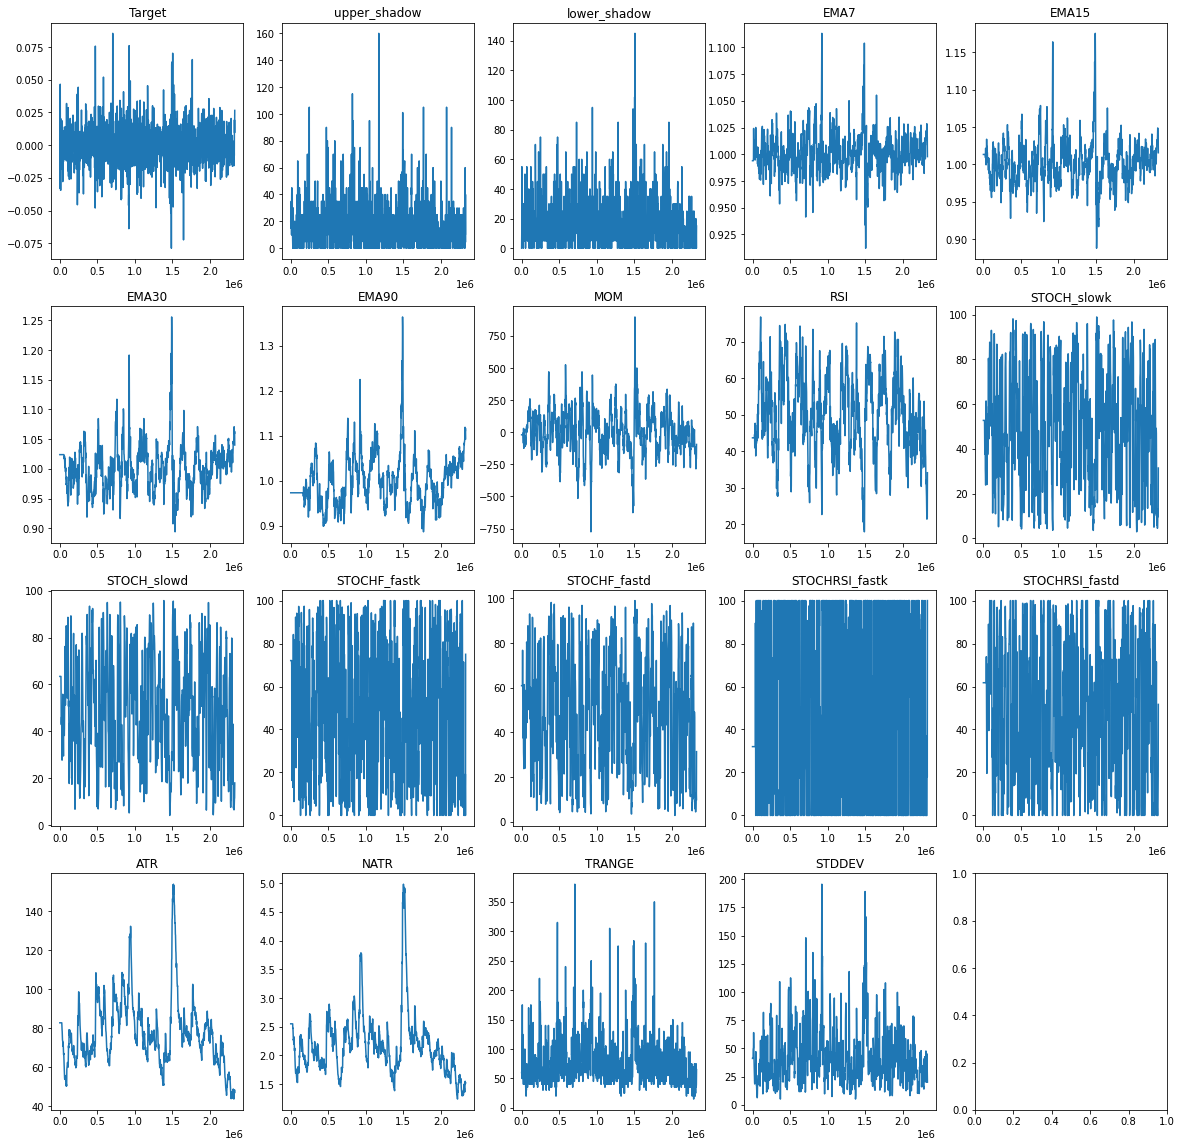

In [33]:
fig, ax = plt.subplots(4,5,figsize=(20,20))
count = 11
for row in range(4):
    for col in range(5):
        ax[row][col].plot(df_1377_added[df_1377_added.columns[count]])
        ax[row][col].set_title(df_1377_added.columns[count])
        count += 1
        if count == 30:
            break

<AxesSubplot:>

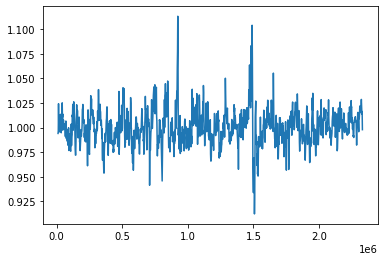

In [30]:
(ta.EMA(df_1377_added['Close'], 7)/df_1377_added['Close']).plot()

In [70]:
df_1377_added['ExpectedDividend'].value_counts()

15.0    605
18.0    255
13.0    221
10.0    121
Name: ExpectedDividend, dtype: int64

In [ ]:
# test : calculate sharpe ratio over train period 
# 결과로 Date, target, rank를 붙인 df를 반환한다.
# cv - train+supp (feature generated) 에서 7-fold time-series cv 이용

def evaluate(train, val):
    global feat_importance, fold
    # train model
    sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_train(sec_list_val)
    X_scaled_val = preprocess_inference(df_added_val, trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=gbm.feature_importances_
    feat_importance.set_index(X_train.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score

In [ ]:
test_train = train.loc[(train.Date > '2020-12-31')]
test_train.tail(5)

In [ ]:
supp_data.Date

### Feature set cases
We don't encode **SecuritiesCode** because many of them are missing certain period

1. basic features - open, high, low, close, volume
2. with TA features
3. hanphil features only
3. with rolling features only

Case 1. Basic features

In [ ]:
# test1 - basic features - open, high, low, close, volume
# evaluate on each CV

# test : calculate sharpe ratio over train period 
# 결과로 Date, target, rank를 붙인 df를 반환한다.
# cv - train+supp (feature generated) 에서 7-fold time-series cv 이용

def evaluate_test1(train, val):
    global feat_importance, fold
    # train model
    sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
    df_added = add_features_test1(sec_list)
    X_scaled, y, trained_scalers = preprocess_train_test1(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_test1(sec_list_val)
    X_scaled_val = preprocess_inference_test1(df_added_val, trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score



tscv = TimeSeriesSplit(n_splits=5)#test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test1(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
                  
print(scores)
print('cv mean score:', np.mean(scores))

In [ ]:
# test1 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

In [ ]:
feat_importance

In [66]:
# test2 - primary features (TA)
# evaluate on each CV
def evaluate_test2(train, val):
    global feat_importance#, fold
    # train model
    sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_train(sec_list_val)
    X_scaled_val = preprocess_inference(df_added_val, trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score


tscv = TimeSeriesSplit(n_splits=5)#test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test2(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
    
print(scores)
print('cv mean score:', np.mean(scores))

========Training fold 1========
training size: 222   test size: 219
Train Date range: 2017-01-04 to 2017-11-24
Valid Date range: 2017-11-27 to 2018-10-16
Divide securities individually..


 21%|██▏       | 401/1886 [00:03<00:14, 104.71it/s]

error in SecuritiesCode: 3540


,Date,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,upper_shadow,lower_shadow
0,2017-01-04,20170104_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
1,2017-01-05,20170105_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
2,2017-01-06,20170106_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
3,2017-01-10,20170110_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
4,2017-01-11,20170111_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2017-11-17,20171117_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
218,2017-11-20,20171120_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
219,2017-11-21,20171121_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
220,2017-11-22,20171122_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN


100%|██████████| 1886/1886 [00:20<00:00, 90.12it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:12<00:00, 18.22it/s]


evaluated score: 0.361919922127626
Fold 1 evaluated in 68.524s
Fold 1 score: 0.361920
========Training fold 2========
training size: 441   test size: 219
Train Date range: 2017-01-04 to 2018-10-16
Valid Date range: 2018-10-17 to 2019-09-11
Divide securities individually..


100%|██████████| 1920/1920 [00:21<00:00, 88.04it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:12<00:00, 17.11it/s]


evaluated score: 0.22867929064411632
Fold 2 evaluated in 75.563s
Fold 2 score: 0.228679
========Training fold 3========
training size: 660   test size: 219
Train Date range: 2017-01-04 to 2019-09-11
Valid Date range: 2019-09-12 to 2020-08-11
Divide securities individually..


100%|██████████| 1947/1947 [00:21<00:00, 88.57it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:12<00:00, 17.34it/s]


evaluated score: 0.17623850982615458
Fold 3 evaluated in 79.377s
Fold 3 score: 0.176239
========Training fold 4========
training size: 879   test size: 219
Train Date range: 2017-01-04 to 2020-08-11
Valid Date range: 2020-08-12 to 2021-07-01
Divide securities individually..


100%|██████████| 1981/1981 [00:24<00:00, 82.23it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:14<00:00, 15.57it/s]


evaluated score: 0.19361826665770113
Fold 4 evaluated in 90.638s
Fold 4 score: 0.193618
========Training fold 5========
training size: 1098   test size: 219
Train Date range: 2017-01-04 to 2021-07-01
Valid Date range: 2021-07-02 to 2022-05-27
Divide securities individually..


100%|██████████| 2000/2000 [00:24<00:00, 81.00it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:11<00:00, 18.65it/s]


evaluated score: 0.006143796398742259
Fold 5 evaluated in 93.959s
Fold 5 score: 0.006144
[0.361919922127626, 0.22867929064411632, 0.17623850982615458, 0.19361826665770113, 0.006143796398742259]
cv mean score: 0.19331995713086805


In [67]:
# test2 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,))
#                          hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

### test2 - without columns['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close'] - 더 향상된 cv score

- Stationary features만 남기는게 중요한 것 같다.



In [69]:
# test2 - without columns=['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close']

# evaluate on each CV
def evaluate_test2(train, val):
    global feat_importance#, fold
    # train model
    sec_list = divideSecurities(train)
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_train(sec_list_val)
    X_scaled_val = preprocess_inference(df_added_val, trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score


tscv = TimeSeriesSplit(n_splits=5)#test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test2(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
    
print(scores)
print('cv mean score:', np.mean(scores))


# test2 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,))
#                          hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

========Training fold 1========
training size: 222   test size: 219
Train Date range: 2017-01-04 to 2017-11-24
Valid Date range: 2017-11-27 to 2018-10-16
Divide securities individually..


 21%|██▏       | 401/1886 [00:04<00:17, 86.37it/s] 

error in SecuritiesCode: 3540


,Date,RowId,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,upper_shadow,lower_shadow
0,2017-01-04,20170104_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
1,2017-01-05,20170105_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
2,2017-01-06,20170106_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
3,2017-01-10,20170110_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
4,2017-01-11,20170111_3540,3540,NaN,NaN,NaN,NaN,0,1.0,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2017-11-17,20171117_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
218,2017-11-20,20171120_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
219,2017-11-21,20171121_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN
220,2017-11-22,20171122_3540,3540,NaN,NaN,NaN,NaN,0,1.0,0.0,True,NaN,NaN,NaN


100%|██████████| 1886/1886 [00:21<00:00, 89.77it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:11<00:00, 18.36it/s]


evaluated score: 0.39883064050731243
Fold 1 evaluated in 68.102s
Fold 1 score: 0.398831
========Training fold 2========
training size: 441   test size: 219
Train Date range: 2017-01-04 to 2018-10-16
Valid Date range: 2018-10-17 to 2019-09-11
Divide securities individually..


100%|██████████| 1920/1920 [00:24<00:00, 78.39it/s] 


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:12<00:00, 17.45it/s]


evaluated score: 0.21645503877104602
Fold 2 evaluated in 76.797s
Fold 2 score: 0.216455
========Training fold 3========
training size: 660   test size: 219
Train Date range: 2017-01-04 to 2019-09-11
Valid Date range: 2019-09-12 to 2020-08-11
Divide securities individually..


100%|██████████| 1947/1947 [00:23<00:00, 81.76it/s]


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:10<00:00, 21.86it/s]


evaluated score: 0.19104062646982345
Fold 3 evaluated in 78.802s
Fold 3 score: 0.191041
========Training fold 4========
training size: 879   test size: 219
Train Date range: 2017-01-04 to 2020-08-11
Valid Date range: 2020-08-12 to 2021-07-01
Divide securities individually..


100%|██████████| 1981/1981 [00:25<00:00, 77.33it/s]


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:13<00:00, 15.90it/s]


evaluated score: 0.21079611802499557
Fold 4 evaluated in 89.691s
Fold 4 score: 0.210796
========Training fold 5========
training size: 1098   test size: 219
Train Date range: 2017-01-04 to 2021-07-01
Valid Date range: 2021-07-02 to 2022-05-27
Divide securities individually..


100%|██████████| 2000/2000 [00:26<00:00, 75.16it/s]


Divide securities individually..


  0%|          | 0/219 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 219/219 [00:13<00:00, 15.95it/s]


evaluated score: 0.002573744763343031
Fold 5 evaluated in 95.036s
Fold 5 score: 0.002574
[0.39883064050731243, 0.21645503877104602, 0.19104062646982345, 0.21079611802499557, 0.002573744763343031]
cv mean score: 0.2039392337073041


In [73]:
# cv - test 3 month period
# test2 - without columns=['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close']

# evaluate on each CV
def evaluate_test2(train, val):
    global feat_importance#, fold
    # train model
    sec_list = divideSecurities(train)
    df_added = add_features_train(sec_list)
    X_scaled, y, trained_scalers = preprocess_train(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_train(sec_list_val)
    X_scaled_val = preprocess_inference(df_added_val, trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score


tscv = TimeSeriesSplit(n_splits=7, test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test2(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
    
print(scores)
print('cv mean score:', np.mean(scores), end='\t')
print('cv std:', np.std(scores))


# test2 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,))
#                          hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

========Training fold 1========
training size: 897   test size: 60
Train Date range: 2017-01-04 to 2020-09-04
Valid Date range: 2020-09-07 to 2020-12-03
Divide securities individually..


100%|██████████| 1982/1982 [00:28<00:00, 69.55it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:00<00:00, 91.49it/s]


evaluated score: 0.3072154565748155
Fold 1 evaluated in 81.462s
Fold 1 score: 0.307215
========Training fold 2========
training size: 957   test size: 60
Train Date range: 2017-01-04 to 2020-12-03
Valid Date range: 2020-12-04 to 2021-03-04
Divide securities individually..


100%|██████████| 1991/1991 [00:27<00:00, 72.97it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:01<00:00, 45.28it/s]


evaluated score: 0.5592095787315955
Fold 2 evaluated in 82.521s
Fold 2 score: 0.559210
========Training fold 3========
training size: 1017   test size: 60
Train Date range: 2017-01-04 to 2021-03-04
Valid Date range: 2021-03-05 to 2021-06-02
Divide securities individually..


100%|██████████| 2000/2000 [00:27<00:00, 71.43it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:01<00:00, 47.32it/s]


evaluated score: 0.22756211224312436
Fold 3 evaluated in 84.036s
Fold 3 score: 0.227562
========Training fold 4========
training size: 1077   test size: 60
Train Date range: 2017-01-04 to 2021-06-02
Valid Date range: 2021-06-03 to 2021-08-30
Divide securities individually..


100%|██████████| 2000/2000 [00:27<00:00, 72.77it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:01<00:00, 45.37it/s]


evaluated score: 0.5932704411584233
Fold 4 evaluated in 84.184s
Fold 4 score: 0.593270
========Training fold 5========
training size: 1137   test size: 60
Train Date range: 2017-01-04 to 2021-08-30
Valid Date range: 2021-08-31 to 2021-11-26
Divide securities individually..


100%|██████████| 2000/2000 [00:26<00:00, 76.31it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:00<00:00, 90.41it/s] 


evaluated score: 0.15132764045202607
Fold 5 evaluated in 80.941s
Fold 5 score: 0.151328
========Training fold 6========
training size: 1197   test size: 60
Train Date range: 2017-01-04 to 2021-11-26
Valid Date range: 2021-11-29 to 2022-02-25
Divide securities individually..


100%|██████████| 2000/2000 [00:27<00:00, 73.71it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:00<00:00, 94.71it/s] 


evaluated score: 0.04301805132064397
Fold 6 evaluated in 82.700s
Fold 6 score: 0.043018
========Training fold 7========
training size: 1257   test size: 60
Train Date range: 2017-01-04 to 2022-02-25
Valid Date range: 2022-02-28 to 2022-05-27
Divide securities individually..


100%|██████████| 2000/2000 [00:27<00:00, 71.43it/s]


Divide securities individually..


  0%|          | 0/60 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 60/60 [00:01<00:00, 46.01it/s]


evaluated score: 0.1911502169185436
Fold 7 evaluated in 86.296s
Fold 7 score: 0.191150
[0.3072154565748155, 0.5592095787315955, 0.22756211224312436, 0.5932704411584233, 0.15132764045202607, 0.04301805132064397, 0.1911502169185436]
cv mean score: 0.296107642485596


In [ ]:
# test3 - Hanphil features
# evaluate on each CV

# test : calculate sharpe ratio over train period 
# 결과로 Date, target, rank를 붙인 df를 반환한다.
# cv - train+supp (feature generated) 에서 7-fold time-series cv 이용

def evaluate_test3(train, val):
    global feat_importance, fold
    # train model
    sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
    df_added = add_features_test3(sec_list)
    X_scaled, y, trained_scalers = preprocess_train_test3(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_test3(sec_list_val)
    X_scaled_val = preprocess_train_test3(df_added_val, train=False, trained_scalers=trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score



tscv = TimeSeriesSplit(n_splits=5)#test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test3(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
                  
print(scores)
print('cv mean score:', np.mean(scores))

In [ ]:
# test3 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

case 4 - rolling features only  
ref : https://www.kaggle.com/code/kellibelcher/jpx-stock-market-analysis-prediction-with-lgbm

In [ ]:
def generate_adjusted_close(df):
    """
    Args:
        df (pd.DataFrame)  : stock_price for a single SecuritiesCode
    Returns:
        df (pd.DataFrame): stock_price with AdjustedClose for a single SecuritiesCode
    """
    # sort data to generate CumulativeAdjustmentFactor
    df = df.sort_values("Date", ascending=False)
    # generate CumulativeAdjustmentFactor
    df.loc[:, "CumulativeAdjustmentFactor"] = df["AdjustmentFactor"].cumprod()
    # generate AdjustedClose
    df.loc[:, "AdjustedClose"] = (
        df["CumulativeAdjustmentFactor"] * df["Close"]
    ).map(lambda x: float(
        Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
    ))
    # reverse order
    df = df.sort_values("Date")
    # to fill AdjustedClose, replace 0 into np.nan
    df.loc[df["AdjustedClose"] == 0, "AdjustedClose"] = np.nan
    # forward fill AdjustedClose
    df.loc[:, "AdjustedClose"] = df.loc[:, "AdjustedClose"].ffill()
    return df

def create_features(df):
    df=df.copy()
    col='AdjustedClose'
    periods=[5,10,20,30,50]
    for period in periods:
        df.loc[:,"Return_{}Day".format(period)] = df.groupby("SecuritiesCode")[col].pct_change(period)
        df.loc[:,"MovingAvg_{}Day".format(period)] = df.groupby("SecuritiesCode")[col].rolling(window=period).mean().values
        df.loc[:,"ExpMovingAvg_{}Day".format(period)] = df.groupby("SecuritiesCode")[col].ewm(span=period,adjust=False).mean().values
        df.loc[:,"Volatility_{}Day".format(period)] = np.log(df[col]).groupby(df["SecuritiesCode"]).diff().rolling(period).std()
    return df

In [ ]:
def add_features_test4(sec_list): # rolling features only
    df_list = []
    for df in tqdm(sec_list):
        
        # lagged feature 계산하기 전 결측치 채워넣기
        df = df.fillna(method='ffill')

        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
        
        df = generate_adjusted_close(df)
        df = create_features(df)
#         df.drop(['RowId','SupervisionFlag','AdjustmentFactor','CumulativeAdjustmentFactor','Close'],axis=1,inplace=True)
        

        
        
        df_list.append(df)
        
        del df
        
    gc.collect()
    df_feature_added = pd.concat(df_list).sort_values(['Date','SecuritiesCode'])
    
    return df_feature_added


def preprocess_train_test4(df, train=True, trained_scalers=None):
    
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag', 
                          'CumulativeAdjustmentFactor','Close'])
    
    if train:
    #     minmax = MinMaxScaler()
        stdsc = StandardScaler()
    #     ordinal = OrdinalEncoder()
    else:
        stdsc = trained_scalers[0]

    target = ['Target']
#     minmax_features = ['Date']

    # not used in case1
    #ord_features = ['SecuritiesCode'] 
    
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in dfc.columns if i not in ['Date', 'Target', 'SecuritiesCode']]
    
    
#     date_scaled = minmax.fit_transform(dfc.loc[:,minmax_features])
#     date_code_ord = ordinal.fit_transform(dfc.loc[:,ord_features])
    scaled = stdsc.fit_transform(dfc.loc[:,scaled_features])
    
#     display(pd.DataFrame(date_code_ord, columns=ord_features))
#     display(pd.DataFrame(scaled, columns=scaled_features))
    
    
    dfc_scaled = pd.concat([dfc.loc[:, ['SecuritiesCode']].reset_index(drop=True),
#                             pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features)], 
                            axis=1)
    dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
                           axis=1)
    dfc_scaled = dfc_scaled.set_index(['Date'])

    y = dfc.set_index(['Date']).loc[:, ['Target']]
    
    if train:
        return dfc_scaled, y, [stdsc]
    else:
        return dfc_scaled

In [ ]:
# test4 - with rolling features only
# evaluate on each CV
from decimal import ROUND_HALF_UP, Decimal
# test : calculate sharpe ratio over train period 
# 결과로 Date, target, rank를 붙인 df를 반환한다.
# cv - train+supp (feature generated) 에서 7-fold time-series cv 이용

def evaluate_test4(train, val):
    global feat_importance, fold
    # train model
    sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
    df_added = add_features_test4(sec_list)
    X_scaled, y, trained_scalers = preprocess_train_test4(df_added)
    
    # base model - lgbm 
    lgb = LGBMRegressor()
    lgb.fit(X_scaled, y)
    
    # predict evaluation data - same as train
    sec_list_val = divideSecurities(val)
    df_added_val = add_features_test4(sec_list_val)
    X_scaled_val = preprocess_train_test4(df_added_val, train=False, trained_scalers=trained_scalers)
    
    y_pred = lgb.predict(X_scaled_val)
    val['predict'] = y_pred
    
    feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
    feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
    # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
    eval_dates = val['Date'].unique()  # supp 일자 리스트

    predicted_df_list = []
    for i, date in enumerate(tqdm(eval_dates)):
        X = val[val['Date'] == date]
        # X, y
        X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

        # check Rank
        assert X["Rank"].notna().all()
        assert X["Rank"].min() == 0
        assert X["Rank"].max() == len(X["Rank"]) - 1
        predicted_df_list.append(X)

    predicted_df = pd.concat(predicted_df_list)
#     display(predicted_df)
    eval_score = calc_spread_return_sharpe(predicted_df)
    print('evaluated score:', eval_score)
    return eval_score



tscv = TimeSeriesSplit(n_splits=5)#test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# split input : index date
grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])

# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).set_index('Date')

scores = []
k = 0
feat_importance = pd.DataFrame([])
for train_idx, eval_idx in tscv.split(grid):
    k += 1
    print(f'========Training fold {k}========')
    t0 = time.time()
    print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
    print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
    print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
    score = evaluate_test4(train_with_supp.loc[grid[train_idx]].reset_index(),
                     train_with_supp.loc[grid[eval_idx]].reset_index())
    print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
    print(f'Fold {k} score: {score :.6f}')
    scores.append(score)
                  
print(scores)
print('cv mean score:', np.mean(scores))

In [ ]:
# test4 feature importances plot
feat_importance['avg'] = feat_importance.mean(axis=1)
feat_importance = feat_importance.sort_values(by='avg',ascending=True)
pal=sns.color_palette("plasma_r", 30).as_hex()[2:]

fig=go.Figure()
for i in range(len(feat_importance.index)):
    fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
                       line_color=pal[::-1][i],opacity=0.7,line_width=4))
fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
                         marker_color=pal[::-1], marker_size=8,
                         hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

fig.show()

In [ ]:
feat_importance

Feature selection 결론?
- case2 의 features 를 적극 이용
- 나머지 case에서 상위 5개정도의 feature들을 이용
- feature끼리의 상관계수 측정하여 너무 높은것은 뺌
- target과의 상관계수도 살펴보기